In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import ase
import ase.io
from ase.data import atomic_masses
from chemiscope import write_input

# Dimensionality reduction exercises

The first exercise asks us to collect the data from the trajectory.  The filled in PLUMED input for this exercise is as follows:

In [2]:
pcollect='''MOLINFO STRUCTURE=../../data/bhp.pdb MOLTYPE=protein
            cc: COLLECT_FRAMES ATOMS=@nonhydrogens
            OUTPUT_ANALYSIS_DATA_TO_PDB USE_OUTPUT_DATA_FROM=cc FILE=traj.pdb'''

We are going to revert to running commands using bash commands in the notebook here.  In other words, we will stop using the python interface and will work with PLUMED driver directly.  

In [3]:
!mkdir ../Dimensionality_reduction_exercises
!mkdir ../Dimensionality_reduction_exercises/Exercise_1
# Output the file above to the input
f = open("../Dimensionality_reduction_exercises/Exercise_1/plumed.dat", "w")
f.write( pcollect )
f.close()
# Run PLUMED
!cd ../Dimensionality_reduction_exercises/Exercise_1 && plumed driver --mf_pdb ../../data/traj.pdb > /dev/null

## PCA

The input to do the PCA calculation with PLUMED is as follows:

In [4]:
ppca = '''MOLINFO STRUCTURE=../../data/bhp.pdb MOLTYPE=protein
          cc: COLLECT_FRAMES ATOMS=@nonhydrogens
          pca: PCA USE_OUTPUT_DATA_FROM=cc METRIC=OPTIMAL NLOW_DIM=2
          dat: PROJECT_ALL_ANALYSIS_DATA USE_OUTPUT_DATA_FROM=cc PROJECTION=pca
          OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=dat ARG=dat.* FILE=pca_data
          alpha: ALPHARMSD RESIDUES=all
          abeta: ANTIBETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
          pbeta: PARABETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
          cc2: COLLECT_FRAMES ARG=alpha,abeta,pbeta
          OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=cc2 ARG=cc2.* FILE=secondary_structure_data'''

We now run this calculation using PLUMED

In [5]:
!mkdir ../Dimensionality_reduction_exercises/Exercise_2
# Output the file above to the input
f = open("../Dimensionality_reduction_exercises/Exercise_2/plumed.dat", "w")
f.write( ppca )
f.close()
# Run PLUMED
!cd ../Dimensionality_reduction_exercises/Exercise_2 && plumed driver --mf_pdb ../../data/traj.pdb > /dev/null

We can now read in the projection that this command outputted so that it can be plotted within this notebook as shown below:

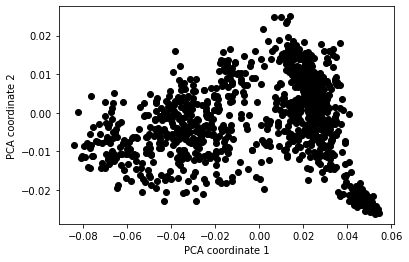

In [6]:
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_2/pca_data")
plt.plot( projection[:,0], projection[:,1], 'ko')
plt.xlabel("PCA coordinate 1")
plt.ylabel("PCA coordinate 2")
plt.show()



It is better, however, to output an input for chemiscope in order to visualise the data.  This is what we do using the code below:

In [7]:
# Read in the trajectory using ase
traj = ase.io.read('../data/traj.pdb',':')
# Read in the projection 
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_2/pca_data")
# Read in secondary structure data
structure = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_2/secondary_structure_data")

# This ensures that the atomic masses are used in place of the symbols
# when constructing the chemiscope respresentations of the atomic configurations.
# Using the symbols will not work because ase is written by chemists and not 
# biologists.  For a chemist HG1 is mercury as opposed to the first hydrogen
# on a guanine residue.  
for frame in traj:
    frame.numbers = np.array(
        [
            np.argmin(np.subtract(atomic_masses, float(am)) ** 2)
            for am in frame.arrays["occupancy"]
        ]
    )

# This constructs the dicitionary of properties for chemiscope
properties = {
    "pca1": {
        "target": "structure",
        "values": projection[:,0],
        "description": "First principle component",
    },
    "pca2": {
        "target": "structure",
        "values": projection[:,1],
        "description": "Second principle component",
    },
    "alpha": {
        "target": "structure",
        "values": structure[:,0],
        "description": "Alpha helical content",
    },
    "antibeta": {
        "target": "structure",
        "values": structure[:,1],
        "description": "Anti parallel beta sheet content",
    },
    "parabeta": {
        "target": "structure",
        "values": structure[:,2],
        "description": "Parallel beta sheet content",
    },
}

# This generates our chemiscope output
write_input("pca_chemiscope.json.gz", frames=traj[1:], properties=properties )

## MDS

The input to do the MDS calculation with PLUMED is as follow

In [8]:
pmds = '''MOLINFO STRUCTURE=../../data/bhp.pdb MOLTYPE=protein
          cc: COLLECT_FRAMES ATOMS=@nonhydrogens
          r2-phi: TORSION ATOMS=@phi-2
          r2-psi: TORSION ATOMS=@psi-2
          r3-phi: TORSION ATOMS=@phi-3
          r3-psi: TORSION ATOMS=@psi-3
          r4-phi: TORSION ATOMS=@phi-4
          r4-psi: TORSION ATOMS=@psi-4
          r5-phi: TORSION ATOMS=@phi-5
          r5-psi: TORSION ATOMS=@psi-5
          r6-phi: TORSION ATOMS=@phi-6
          r6-psi: TORSION ATOMS=@psi-6
          r7-phi: TORSION ATOMS=@phi-7
          r7-psi: TORSION ATOMS=@psi-7
          r8-phi: TORSION ATOMS=@phi-8
          r8-psi: TORSION ATOMS=@psi-8
          r9-phi: TORSION ATOMS=@phi-9
          r9-psi: TORSION ATOMS=@psi-9
          r10-phi: TORSION ATOMS=@phi-10
          r10-psi: TORSION ATOMS=@psi-10
          r11-phi: TORSION ATOMS=@phi-11
          r11-psi: TORSION ATOMS=@psi-11
          r12-phi: TORSION ATOMS=@phi-12
          r12-psi: TORSION ATOMS=@psi-12
          r13-phi: TORSION ATOMS=@phi-13
          r13-psi: TORSION ATOMS=@psi-13
          r14-phi: TORSION ATOMS=@phi-14
          r14-psi: TORSION ATOMS=@psi-14
          r15-phi: TORSION ATOMS=@phi-15
          r15-psi: TORSION ATOMS=@psi-15
          r16-phi: TORSION ATOMS=@phi-16
          r16-psi: TORSION ATOMS=@psi-16
          angles: COLLECT_FRAMES ARG=r2-phi,r2-psi,r3-phi,r3-psi,r4-phi,r4-psi,r5-phi,r5-psi,r6-phi,r6-psi,r7-phi,r7-psi,r8-phi,r8-psi,r9-phi,r9-psi,r10-phi,r10-psi,r11-phi,r11-psi,r12-phi,r12-psi,r13-phi,r13-psi,r14-phi,r14-psi,r15-phi,r15-psi,r16-phi,r16-psi
          distmat: EUCLIDEAN_DISSIMILARITIES USE_OUTPUT_DATA_FROM=angles METRIC=EUCLIDEAN
          fps: LANDMARK_SELECT_FPS USE_OUTPUT_DATA_FROM=distmat NLANDMARKS=500
          mds: CLASSICAL_MDS USE_OUTPUT_DATA_FROM=fps NLOW_DIM=2
          osample: PROJECT_ALL_ANALYSIS_DATA USE_OUTPUT_DATA_FROM=distmat PROJECTION=mds
          OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=osample ARG=osample.* FILE=mds_data
          alpha: ALPHARMSD RESIDUES=all
          abeta: ANTIBETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
          pbeta: PARABETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
          cc2: COLLECT_FRAMES ARG=alpha,abeta,pbeta
          OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=cc2 ARG=cc2.* FILE=secondary_structure_data'''

We now run this calculation using PLUMED

In [10]:
!mkdir ../Dimensionality_reduction_exercises/Exercise_3
# Output the file above to the input
f = open("../Dimensionality_reduction_exercises/Exercise_3/plumed.dat", "w")
f.write( pmds )
f.close()
# Run PLUMED
!cd ../Dimensionality_reduction_exercises/Exercise_3 && plumed driver --mf_pdb ../../data/traj.pdb > /dev/null

mkdir: ../Dimensionality_reduction_exercises/Exercise_3: File exists


Quick plot to check PLUMED has run correctly

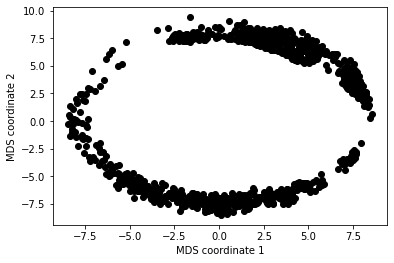

In [11]:
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_3/mds_data")
plt.plot( projection[:,0], projection[:,1], 'ko')
plt.xlabel("MDS coordinate 1")
plt.ylabel("MDS coordinate 2")
plt.show()

And generate the chemiscope

In [12]:
# Read in the trajectory using ase
traj = ase.io.read('../data/traj.pdb',':')
# Read in the projection 
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_3/mds_data")
# Read in secondary structure data
structure = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_3/secondary_structure_data")

# This ensures that the atomic masses are used in place of the symbols
# when constructing the chemiscope respresentations of the atomic configurations.
# Using the symbols will not work because ase is written by chemists and not 
# biologists.  For a chemist HG1 is mercury as opposed to the first hydrogen
# on a guanine residue.  
for frame in traj:
    frame.numbers = np.array(
        [
            np.argmin(np.subtract(atomic_masses, float(am)) ** 2)
            for am in frame.arrays["occupancy"]
        ]
    )
    
# This constructs the dicitionary of properties for chemiscope
properties = {
    "mds1": {
        "target": "structure",
        "values": projection[:,0],
        "description": "First mds component",
    },
    "mds2": {
        "target": "structure",
        "values": projection[:,1],
        "description": "Second mds component",
    },
    "alpha": {
        "target": "structure",
        "values": structure[:,0],
        "description": "Alpha helical content",
    },
    "antibeta": {
        "target": "structure",
        "values": structure[:,1],
        "description": "Anti parallel beta sheet content",
    },
    "parabeta": {
        "target": "structure",
        "values": structure[:,2],
        "description": "Parallel beta sheet content",
    },
}

# This generates our chemiscope output
write_input("mds_chemiscope.json.gz", frames=traj[1:], properties=properties )

## Sketch-map

The input to do the sketch-map calculation with PLUMED is as follows

In [13]:
psmap = '''MOLINFO STRUCTURE=../../data/bhp.pdb MOLTYPE=protein
           cc: COLLECT_FRAMES ATOMS=@nonhydrogens
           r2-phi: TORSION ATOMS=@phi-2
           r2-psi: TORSION ATOMS=@psi-2
           r3-phi: TORSION ATOMS=@phi-3
           r3-psi: TORSION ATOMS=@psi-3
           r4-phi: TORSION ATOMS=@phi-4
           r4-psi: TORSION ATOMS=@psi-4
           r5-phi: TORSION ATOMS=@phi-5
           r5-psi: TORSION ATOMS=@psi-5
           r6-phi: TORSION ATOMS=@phi-6
           r6-psi: TORSION ATOMS=@psi-6
           r7-phi: TORSION ATOMS=@phi-7
           r7-psi: TORSION ATOMS=@psi-7
           r8-phi: TORSION ATOMS=@phi-8
           r8-psi: TORSION ATOMS=@psi-8
           r9-phi: TORSION ATOMS=@phi-9
           r9-psi: TORSION ATOMS=@psi-9
           r10-phi: TORSION ATOMS=@phi-10
           r10-psi: TORSION ATOMS=@psi-10
           r11-phi: TORSION ATOMS=@phi-11
           r11-psi: TORSION ATOMS=@psi-11
           r12-phi: TORSION ATOMS=@phi-12
           r12-psi: TORSION ATOMS=@psi-12
           r13-phi: TORSION ATOMS=@phi-13
           r13-psi: TORSION ATOMS=@psi-13
           r14-phi: TORSION ATOMS=@phi-14
           r14-psi: TORSION ATOMS=@psi-14
           r15-phi: TORSION ATOMS=@phi-15
           r15-psi: TORSION ATOMS=@psi-15
           r16-phi: TORSION ATOMS=@phi-16
           r16-psi: TORSION ATOMS=@psi-16
           angles: COLLECT_FRAMES ARG=r2-phi,r2-psi,r3-phi,r3-psi,r4-phi,r4-psi,r5-phi,r5-psi,r6-phi,r6-psi,r7-phi,r7-psi,r8-phi,r8-psi,r9-phi,r9-psi,r10-phi,r10-psi,r11-phi,r11-psi,r12-phi,r12-psi,r13-phi,r13-psi,r14-phi,r14-psi,r15-phi,r15-psi,r16-phi,r16-psi
           distmat: EUCLIDEAN_DISSIMILARITIES USE_OUTPUT_DATA_FROM=angles METRIC=EUCLIDEAN
           fps: LANDMARK_SELECT_FPS USE_OUTPUT_DATA_FROM=distmat NLANDMARKS=500
           smap: SKETCH_MAP MATRIX=fps NLOW_DIM=2 HIGH_DIM_FUNCTION={SMAP R_0=6 A=8 B=2} LOW_DIM_FUNCTION={SMAP R_0=6 A=2 B=2} CGTOL=1E-3 CGRID_SIZE=20 FGRID_SIZE=200 ANNEAL_STEPS=0
           osample: PROJECT_ALL_ANALYSIS_DATA USE_OUTPUT_DATA_FROM=distmat PROJECTION=smap
           OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=osample ARG=osample.* FILE=smap_data
           alpha: ALPHARMSD RESIDUES=all
           abeta: ANTIBETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
           pbeta: PARABETARMSD RESIDUES=all STRANDS_CUTOFF=1.0
           cc2: COLLECT_FRAMES ARG=alpha,abeta,pbeta
           OUTPUT_ANALYSIS_DATA_TO_COLVAR USE_OUTPUT_DATA_FROM=cc2 ARG=cc2.* FILE=secondary_structure_data
'''

We now run the calculation with PLUMED.

In [14]:
!mkdir ../Dimensionality_reduction_exercises/Exercise_4
# Output the file above to the input
f = open("../Dimensionality_reduction_exercises/Exercise_4/plumed.dat", "w")
f.write( psmap )
f.close()
# Run PLUMED
!cd ../Dimensionality_reduction_exercises/Exercise_4 && plumed driver --mf_pdb ../../data/traj.pdb > /dev/null

Quick plot to check PLUMED has run correctly

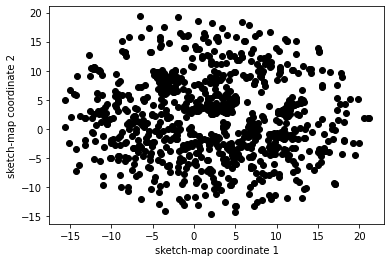

In [15]:
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_4/smap_data")
plt.plot( projection[:,0], projection[:,1], 'ko')
plt.xlabel("sketch-map coordinate 1")
plt.ylabel("sketch-map coordinate 2")
plt.show()

And generate the chemiscope

In [16]:
# Read in the trajectory using ase
traj = ase.io.read('../data/traj.pdb',':')
# Read in the projection 
projection = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_4/smap_data")
# Read in secondary structure data
structure = np.loadtxt("../Dimensionality_reduction_exercises/Exercise_4/secondary_structure_data")

# This ensures that the atomic masses are used in place of the symbols
# when constructing the chemiscope respresentations of the atomic configurations.
# Using the symbols will not work because ase is written by chemists and not 
# biologists.  For a chemist HG1 is mercury as opposed to the first hydrogen
# on a guanine residue.  
for frame in traj:
    frame.numbers = np.array(
        [
            np.argmin(np.subtract(atomic_masses, float(am)) ** 2)
            for am in frame.arrays["occupancy"]
        ]
    )
    
# This constructs the dicitionary of properties for chemiscope
properties = {
    "smap1": {
        "target": "structure",
        "values": projection[:,0],
        "description": "First sketch-map component",
    },
    "smap2": {
        "target": "structure",
        "values": projection[:,1],
        "description": "Second sketch-map component",
    },
    "alpha": {
        "target": "structure",
        "values": structure[:,0],
        "description": "Alpha helical content",
    },
    "antibeta": {
        "target": "structure",
        "values": structure[:,1],
        "description": "Anti parallel beta sheet content",
    },
    "parabeta": {
        "target": "structure",
        "values": structure[:,2],
        "description": "Parallel beta sheet content",
    },
}

# This generates our chemiscope output
write_input("smap_chemiscope.json.gz", frames=traj[1:], properties=properties )